### Research Papers Recomendation System

I tried to make a content-based recommendation system for research articles using NearestNeighbors unsupervised learning methods.NearestNeighbors is an unsupervised technique of finding the nearest data points with respect to each data point. Visit the following link for additional information about the Nearest Neighbors unsupervised learning-based method: https://scikit-learn.org/stable/modules/neighbors.html
The data is downloaded from the IEEE website, and all these research publications are  Conferences and journal papers of the year 2022 and early access of 2023. All research articles belong to the area of AI, Data Science, Machine learning, Deep Learning, Data Mining, and NLP.  Total records are 1559.
data source website : https://ieeexplore.ieee.org/Xplore/home.jsp

In [45]:
import numpy as np 
import pandas as pd 

In [46]:
articles = pd.read_csv('ieeeArticles2022_2023.csv') # import the file

Data Preprocessing

In [47]:
articles.head(2)

,Sno,Document Title,Authors,Author Affiliations,Publication Title,Date Added To Xplore,Publication Year,Volume,Issue,Start Page,...,Mesh_Terms,Article Citation Count,Patent Citation Count,Reference Count,License,Online Date,Issue Date,Meeting Date,Publisher,Document Identifier
0,1,KTI-RNN: Recognition of Heart Failure from Cli...,D. Li; H. Ma; W. Li; B. Zhao; J. Zhao; Y. Liu;...,"College of Data Science, Taiyuan University of...",Tsinghua Science and Technology,21-Jul-22,2023,28,1.0,117,...,NaN,NaN,NaN,49.0,NaN,21-Jul-22,NaN,NaN,TUP,TUP Journals
1,2,Blockchain Data Analysis from the Perspective ...,W. Song; W. Zhang; J. Wang; L. Zhai; P. Jiang;...,"School of Information Science and Engineering,...",Tsinghua Science and Technology,21-Jul-22,2023,28,1.0,176,...,NaN,NaN,NaN,NaN,NaN,21-Jul-22,NaN,NaN,TUP,TUP Journals


In [48]:
print(" Total number of rows and columns: ", articles.shape) 
articles.columns

 Total number of rows and columns:  (1558, 31)


Index(['Sno', 'Document Title', 'Authors', 'Author Affiliations',
       'Publication Title', 'Date Added To Xplore', 'Publication Year',
       'Volume', 'Issue', 'Start Page', 'End Page', 'Abstract', 'ISSN',
       'ISBNs', 'DOI', 'Funding Information', 'PDF Link', 'Author Keywords',
       'IEEE Terms', 'INSPEC Controlled Terms', 'INSPEC Non-Controlled Terms',
       'Mesh_Terms', 'Article Citation Count', 'Patent Citation Count',
       'Reference Count', 'License', 'Online Date', 'Issue Date',
       'Meeting Date', 'Publisher', 'Document Identifier'],
      dtype='object')

Here are unnecessary columns for our recommender system so removing  these in the first phase and arranging their order also

In [49]:
# Sno, Document Title, Authors, Publication Year, Abstract, DOI, PDF Link, Author Keywords, Online Date, Document Identifier
articles = articles[['Document Title', 'Abstract', 'Authors', 'Author Keywords',\
     'IEEE Terms','Publication Year', 'Document Identifier', 'DOI', 'PDF Link']]

In [50]:
articles.shape

(1558, 9)

In [51]:

# renaming the colums to standard formate 
articles = articles.rename(columns={'Document Title': 'title',\
    'Abstract': 'abstract', 'Authors': 'authors', 'Author Keywords': 'Keywords',\
        'IEEE Terms': 'ieeeKeywords', 'Publication Year': 'year',\
            'Document Identifier': 'journal','DOI': 'doi', 'PDF Link': 'pdfLink' })

In [52]:
articles.columns

Index(['title', 'abstract', 'authors', 'Keywords', 'ieeeKeywords', 'year',
       'journal', 'doi', 'pdfLink'],
      dtype='object')

In [53]:
# total is 1558 articles which have some duplicated 
len(articles['title'].unique()) 

1547

In [54]:
len(articles['abstract'].unique()) # to chect the duplicated or unique items

1538

In [55]:
# article link is unique , didnot contain duplicated links
len(articles['pdfLink'].unique()) 

1558

In [56]:

articles.info() # to check the null values which ha
# abstract = 10, author = 26 ,etc , 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558 entries, 0 to 1557
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         1558 non-null   object
 1   abstract      1540 non-null   object
 2   authors       1526 non-null   object
 3   Keywords      1484 non-null   object
 4   ieeeKeywords  1514 non-null   object
 5   year          1558 non-null   int64 
 6   journal       1558 non-null   object
 7   doi           1548 non-null   object
 8   pdfLink       1558 non-null   object
dtypes: int64(1), object(8)
memory usage: 109.7+ KB


In [57]:
# duplicat =aritcles[aritcles.duplicated('title')]  to show the duplicated row
articles.duplicated('title').sum() # total duplicated rows count

11

In [58]:
# drop nul and emply values from title and abstract colums and others columns will fill by some values
articles = articles.dropna(subset=['abstract', 'doi'], how= 'any')

In [59]:
(articles.isnull() | articles.empty).sum()

title            0
abstract         0
authors         18
Keywords        53
ieeeKeywords    28
year             0
journal          0
doi              0
pdfLink          0
dtype: int64

In [60]:
# drop the nul values from authors column 
articles = articles.dropna(subset='authors') 

In [61]:
# the author keywords and ieee keywords are mostly similar
# so  remove null values when the both colums are empty
(articles.isnull() | articles.empty).sum()

title            0
abstract         0
authors          0
Keywords        35
ieeeKeywords    10
year             0
journal          0
doi              0
pdfLink          0
dtype: int64

In [62]:
# to check autor keyword and ieee keyword on AND condition  where both columns are nul values
(articles['Keywords'].isnull() & articles['ieeeKeywords'].isnull()).sum()


6

In [63]:
# to drop the null values from the both columns when both have null values 
articles = articles.dropna(subset=['Keywords', 'ieeeKeywords'], how="all")

In [64]:
(articles.isnull() | articles.empty).sum()

title            0
abstract         0
authors          0
Keywords        29
ieeeKeywords     4
year             0
journal          0
doi              0
pdfLink          0
dtype: int64

In [65]:
articles.duplicated('title').sum()

0

In [66]:
articles.duplicated('abstract').sum()

0

In [67]:
articles.duplicated('doi').sum()

0

In [68]:
articles.duplicated('pdfLink').sum()

0

In [69]:
# fill the missing values of author keywords from the corresponding values of
#  ieee keyword because both columns have mostly similar keywordss 
articles['Keywords'].fillna(articles['ieeeKeywords'], inplace=True)

In [70]:
articles.shape

(1506, 9)

In [71]:
# no need to fill the missing values in ieeeKeywords , now it's unnecessary we will drop it soon
(articles.isnull() | articles.empty).sum() 

title           0
abstract        0
authors         0
Keywords        0
ieeeKeywords    4
year            0
journal         0
doi             0
pdfLink         0
dtype: int64

In [72]:
articles.duplicated().sum()

0

In [73]:
# dropping ieeeKewword , we added this because to fill up the author keyword, now its unneccessory 
articles.drop("ieeeKeywords", axis=1, inplace=True)

In [74]:
# ISO 639-1 code , you can search in google , this is list of languages supported by python
from langdetect import detect # detect_langs is used to show the % of text
languages = articles['abstract'].apply(detect) # .unique()

<AxesSubplot:xlabel='abstract', ylabel='count'>

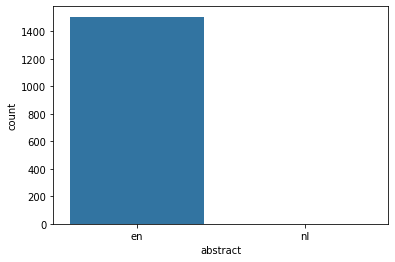

In [75]:
# all articles writen in English language 
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
languages
languages.value_counts(normalize=True)*100
sns.countplot(languages)

we have to extract text link from correspondents values of pdf Link columns, there is a little difference between text link and pdf link ie    
 PDF link:  https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=9836995                                             
 text link: https://ieeexplore.ieee.org/document/9836995                                                   so we have create duplicate colum from pdfLink and rename it textLink

In [76]:
# creat textLink from pdfLink.from pdflink to text
articles['textLink'] = articles.loc[:, 'pdfLink']

In [77]:
# now change the all links in text link column to specific
#  format, from pdf links to text links , we just copied before
#  PDF link:  https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=9836995                                             
#  text link: https://ieeexplore.ieee.org/document/9836995

import re
def convertLink(link):
    x = link.replace("stamp/stamp.jsp?arnumber=", "document/")
    return x

In [78]:
articles['textLink'] = articles['textLink'].apply(convertLink)

In [81]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1506 entries, 0 to 1547
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     1506 non-null   object
 1   abstract  1506 non-null   object
 2   authors   1506 non-null   object
 3   Keywords  1506 non-null   object
 4   year      1506 non-null   int64 
 5   journal   1506 non-null   object
 6   doi       1506 non-null   object
 7   pdfLink   1506 non-null   object
 8   textLink  1506 non-null   object
dtypes: int64(1), object(8)
memory usage: 117.7+ KB


In [80]:
# creat new dataframe from the articles dataframe for vectorization and building model
soup = articles[['title', 'Keywords']] 

In [82]:
soup.shape

(1506, 2)

In [84]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer # lemitize words to meaningful for
lm = WordNetLemmatizer()

In [86]:
# creat a function to clean the text
def removeSigns(txt):
    cleanText = []
    txt = re.sub(r'[^\w\s]', '', txt) # remove all puntuation marks
    txt = re.sub("[0-9]", '', txt) # remove digits
    txt = re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', '', txt) #remove single charater or digits
    txt = re.sub("\s+", " ", txt) # remove multipl spaces to single
    txt = txt.strip() # remove leading and tailing spaces
    txt = txt.lower()
    txt = txt.split() 
    txt = [lm.lemmatize(word) for word in txt if not word in stopwords.words('english')]
    txt = ' '.join(txt) 
    
    cleanText.append(txt)
    return cleanText

In [87]:
soup['title'].head()

0    KTI-RNN: Recognition of Heart Failure from Cli...
1    Blockchain Data Analysis from the Perspective ...
2    Co-Concurrency Mechanism for Multi-GPUs in Dis...
3    Deep Learning based Cross Domain Sentiment Cla...
4    A Comprehensive Review of Deep Learning-based ...
Name: title, dtype: object

In [89]:
soup['title'] = soup['title'].apply(removeSigns)

In [90]:
soup['title'].head()

0     [ktirnn recognition heart failure clinical note]
1    [blockchain data analysis perspective complex ...
2    [coconcurrency mechanism multigpus distributed...
3    [deep learning based cross domain sentiment cl...
4    [comprehensive review deep learningbased metho...
Name: title, dtype: object

In [91]:
soup['Keywords'].head()

0    heart failure;diagnosis;text classification;de...
1    blockchain;cryptocurrency;transaction record;c...
2    concurrent kernel execution;heterogeneous comp...
3    Cross-domain sentiment analysis;deep learning;...
4    Machine Learning;Pneumonia;Radiology;Diagnosti...
Name: Keywords, dtype: object

In [92]:
def cleanKeys(txt):
    cleanText = []
    txt = re.sub('\.|\:|\-|\,', '', txt) # remove . : and - merged words with no space
    # txt = re.sub('\ ', '', txt) # remove white space
    txt = re.sub('\;', ' ', txt) # add space afer the ; sign
    txt = re.sub("\(|\[|\{", " ", txt)
    txt = re.sub("\)|\]|\}", "", txt)
    txt = txt.lower()
    txt = txt.split()
    txt = [lm.lemmatize(word) for word in txt if not word in stopwords.words('english')]
    txt = ' '.join(txt)
    cleanText.append(txt)
    return cleanText

In [93]:
soup['Keywords'] = soup['Keywords'].apply(cleanKeys)

In [94]:
soup['Keywords'].head()

0    [heart failure diagnosis text classification d...
1    [blockchain cryptocurrency transaction record ...
2    [concurrent kernel execution heterogeneous com...
3    [crossdomain sentiment analysis deep learning ...
4    [machine learning pneumonia radiology diagnost...
Name: Keywords, dtype: object

In [95]:
soup.head()

,title,Keywords
0,[ktirnn recognition heart failure clinical note],[heart failure diagnosis text classification d...
1,[blockchain data analysis perspective complex ...,[blockchain cryptocurrency transaction record ...
2,[coconcurrency mechanism multigpus distributed...,[concurrent kernel execution heterogeneous com...
3,[deep learning based cross domain sentiment cl...,[crossdomain sentiment analysis deep learning ...
4,[comprehensive review deep learningbased metho...,[machine learning pneumonia radiology diagnost...


In [96]:
# convert list to strings to concatenate the colums
soup['title']= soup['title'].apply(lambda x: " ".join(x)) 

In [97]:
soup['Keywords']= soup['Keywords'].apply(lambda x: " ".join(x))

In [98]:
# concatenate the title column and kewword coloum named it tags
soup['tags'] = soup['title']+' , '+ soup['Keywords'] 

In [99]:
soup['tags'][3]

'deep learning based cross domain sentiment classification urdu language , crossdomain sentiment analysis deep learning urdu language processing feature engineering'

In [100]:
soup['tags']= soup['tags'].apply(lambda x: x.replace(',', '')) #to remove the comma from the tags

In [101]:
soup['tags'][3]

'deep learning based cross domain sentiment classification urdu language  crossdomain sentiment analysis deep learning urdu language processing feature engineering'

In [102]:
soup['tags'] = soup['tags'].apply(lambda x: x.replace('  ', ' ')) # remove duble space to singl

In [104]:
soup.head()

,title,Keywords,tags
0,ktirnn recognition heart failure clinical note,heart failure diagnosis text classification de...,ktirnn recognition heart failure clinical note...
1,blockchain data analysis perspective complex n...,blockchain cryptocurrency transaction record c...,blockchain data analysis perspective complex n...
2,coconcurrency mechanism multigpus distributed ...,concurrent kernel execution heterogeneous comp...,coconcurrency mechanism multigpus distributed ...
3,deep learning based cross domain sentiment cla...,crossdomain sentiment analysis deep learning u...,deep learning based cross domain sentiment cla...
4,comprehensive review deep learningbased method...,machine learning pneumonia radiology diagnosti...,comprehensive review deep learningbased method...


In [105]:
from sklearn.feature_extraction.text import CountVectorizer # import the feature extraction model n-gram
ngramVC = CountVectorizer(ngram_range=(1, 1), max_features=400,)
ngramX = ngramVC.fit_transform(soup['tags']).toarray()

In [106]:
ngramX.shape

(1506, 400)

In [107]:
# creat dataframe from the vectors
df = pd.DataFrame(ngramX, columns= ngramVC.get_feature_names())
# ngramVC.get_feature_names()

In [108]:
df.head()

,3d,action,active,activity,adaptation,adaptive,adversarial,aggregation,agriculture,ai,...,view,virtual,vision,visual,visualization,vulnerability,web,wireless,word,zeroshot
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
df= df.set_index(articles['title']) # set index as 'title' from the articles dataframe

In [110]:
df.head(2)

,3d,action,active,activity,adaptation,adaptive,adversarial,aggregation,agriculture,ai,...,view,virtual,vision,visual,visualization,vulnerability,web,wireless,word,zeroshot
title,,,,,,,,,,,,,,,,,,,,,
KTI-RNN: Recognition of Heart Failure from Clinical Notes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Blockchain Data Analysis from the Perspective of Complex Networks: Overview,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
soup.index=='coconcurrency mechanism multigpus distributed heterogeneous environment'

array([False, False, False, ..., False, False, False])

In [112]:
from sklearn.neighbors import NearestNeighbors # unsuporvised learning algroithm 
nn = NearestNeighbors(algorithm = 'brute') # algorithm = 'brute'

In [113]:
model = nn.fit(df)

In [114]:
def recomend(paper):
    id = np.where(df.index == paper)[0][0]
    distances, suggestions = (model.kneighbors(df.iloc[id,:].values.reshape(1, -1), n_neighbors=6))
    paperList = []
    for i in suggestions:
        paperList.append(articles.iloc[i])
    return paperList

In [115]:
recomend('Deep Learning based Cross Domain Sentiment Classification for Urdu Language')

[                                                  title  \
 3     Deep Learning based Cross Domain Sentiment Cla...   
 251   A Deep Learning Approach for Public Sentiment ...   
 1130  Deep Learning Techniques for Aspect Based Sent...   
 69    Multi-ideology Multi-class Extremism Classific...   
 951   Sarcasm Over Time and Across Platforms: Does t...   
 87    Aspect-Opinion Correlation Aware and Knowledge...   
 
                                                abstract  \
 3     Sentiment analysis is a widely researched area...   
 251   Sentiment analysis is a process of extracting ...   
 1130  Sentiment analysis is an important tool, which...   
 69    Social media is an integral part of today’s so...   
 951   Sarcasm is a sophisticated form of speech used...   
 87    Cross-domain sentiment analysis has recently a...   
 
                                                 authors  \
 3     A. Altaf; M. W. Anwar; M. Hasan Jamal; S. Hass...   
 251   G. M. S. Hossain; S. Asaduzza

In [ ]:
# # importing jobib file of Articles , df and model
# from joblib import dump
# fileName = 'data.joblib'
# dump(articles, fileName)

In [ ]:
# dump(df, 'vectors.joblib')

In [ ]:
# dump(model, 'nnModel.joblib')